In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from typing import List, Dict, Optional, Literal

In [2]:
print(f"Using pandas version: {pd.__version__}")

Using pandas version: 2.2.1


### About the dataset :
The dataset captures performance metrics from Python-based web servers under varying load conditions. Each server handled requests that returned 63 MB of data. Metrics were collected to provide insights into server performance and resource utilization.

In [3]:
def load_data(file_path: str) -> pd.DataFrame:
    try:
        assert file_path is not None
    except AssertionError:
        raise ValueError("File path cannot be None")
    return pd.read_csv(file_path)

In [4]:
train_df = load_data("../../data/training_data.csv")
test_df = load_data("../../data/testing_data.csv")

In [5]:
train_df.head(10)

,ID,timestamp,cpu_type,cpu_limit,ram_limit,cpu_usage,ram_usage,num_req,conc_lvl,latency
0,2714,2021-11-04 23:15:38,Intel Xeon Gold 5317,2.0,70M,0.084450,46854144.0,100,71,7429000
1,38113,2021-11-04 23:23:27,AMD EPYC 72F3,2.0,70M,0.277893,55934976.0,300,21,2196000
2,33409,2021-11-11 13:32:59,Intel Xeon Platinum 8380,2.5,66M,0.351042,59109376.0,700,1,37000
3,10123,2022-03-19 02:35:05,Intel Xeon Platinum 8356H,0.8,768M,0.026230,43659264.0,100,41,3946000
4,12815,2022-03-17 06:30:29,AMD EPYC 72F3,0.4,512M,0.108346,51048448.0,800,51,5084000
5,28329,2022-03-17 03:24:01,AMD Ryzen 7 5700G,0.7,640M,0.176399,49741824.0,900,1,41000
6,4640,2021-10-29 11:25:58,Intel Core i5-11600KF,4.0,100M,0.338188,63946752.0,800,1,43000
7,37077,2021-11-04 00:06:16,AMD Ryzen 5 5500U,1.5,95M,0.285003,61038592.0,400,101,10501000
8,7195,2022-03-07 03:27:45,Intel Core i5-11500,0.2,256M,0.183900,69357568.0,1000,51,9295000
9,3579,2021-11-10 16:28:36,AMD EPYC 7443P,1.0,75M,0.167426,58519552.0,200,21,2134000


### Uderstanding the dataset
The dataset includes the following information:

- **ID**: Unique identifier for each data point.
- **timestamp**: Time when the metrics were collected.
- **cpu_type**: Type of CPU used by the server.
- **cpu_limit**: CPU allocated to the container.
- **ram_limit**: Memory allocated to the container in megabytes.
- **cpu_usage**: CPU used by the container at the time of metrics collection.
- **ram_usage**: Memory used by the container at the time of metrics collection in bytes.
- **num_req**: Number of requests sent to the container, ranging from 100 to 1000.
- **conc_lvl**: Concurrency level of the requests, ranging from 1 to 100, representing the number of parallel clients making requests.
- **latency**: Least response time for the best 50% of requests in microseconds.


## Stats about the dataset

In [6]:
train_df.describe()

,ID,cpu_limit,cpu_usage,ram_usage,num_req,conc_lvl,latency
count,41134.000000,41134.000000,41134.000000,4.113400e+04,41134.000000,41134.000000,4.113400e+04
mean,29357.337434,1.445007,0.205489,5.377951e+07,532.958137,37.228424,6.483698e+06
std,16909.992230,1.077288,0.141493,7.771771e+06,286.221513,27.515045,1.492553e+07
min,0.000000,0.100000,0.000000,0.000000e+00,100.000000,1.000000,2.500000e+04
25%,14796.250000,0.500000,0.109756,4.941005e+07,300.000000,11.000000,1.175250e+06
50%,29311.500000,1.300000,0.167758,5.224448e+07,500.000000,31.000000,3.756000e+06
75%,43993.750000,2.000000,0.312084,5.872845e+07,800.000000,51.000000,6.022000e+06
max,58762.000000,4.000000,3.998097,1.371832e+08,1000.000000,101.000000,2.667150e+08


In [7]:
rows, cols = train_df.shape
print(f"Training dataset contains {rows} rows and {cols} columns")
rows_, cols_ = test_df.shape
print(f"Testing dataset contains {rows_} rows and {cols_} columns")

Training dataset contains 41134 rows and 10 columns
Testing dataset contains 17629 rows and 9 columns


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41134 entries, 0 to 41133
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         41134 non-null  int64  
 1   timestamp  41134 non-null  object 
 2   cpu_type   41134 non-null  object 
 3   cpu_limit  41134 non-null  float64
 4   ram_limit  41134 non-null  object 
 5   cpu_usage  41134 non-null  float64
 6   ram_usage  41134 non-null  float64
 7   num_req    41134 non-null  int64  
 8   conc_lvl   41134 non-null  int64  
 9   latency    41134 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 3.1+ MB


In [9]:
# get numerical and categorical columns
numerical_columns = train_df.select_dtypes(include=np.number).columns
categorical_columns = train_df.select_dtypes(exclude=np.number).columns
print(
    f"We have {len(numerical_columns)} numerical columns and {len(categorical_columns)} categorical columns"
)
print(f"\n\tNumerical columns: {list(numerical_columns)}")
print(f"\n\tCategorical columns: {list(categorical_columns)}")

We have 7 numerical columns and 3 categorical columns

	Numerical columns: ['ID', 'cpu_limit', 'cpu_usage', 'ram_usage', 'num_req', 'conc_lvl', 'latency']

	Categorical columns: ['timestamp', 'cpu_type', 'ram_limit']


In [10]:
# get the number of missing values in each column
train_df.isna().sum()

ID           0
timestamp    0
cpu_type     0
cpu_limit    0
ram_limit    0
cpu_usage    0
ram_usage    0
num_req      0
conc_lvl     0
latency      0
dtype: int64

In [11]:
# get the number of duplicates
train_df.duplicated(
    subset=[
        "cpu_type",
        "cpu_limit",
        "ram_limit",
        "cpu_usage",
        "ram_usage",
        "num_req",
        "conc_lvl",
    ]
).sum()

0

As we can see, there are neither missing values not duplicates

In [12]:
train_df.head(10)

,ID,timestamp,cpu_type,cpu_limit,ram_limit,cpu_usage,ram_usage,num_req,conc_lvl,latency
0,2714,2021-11-04 23:15:38,Intel Xeon Gold 5317,2.0,70M,0.084450,46854144.0,100,71,7429000
1,38113,2021-11-04 23:23:27,AMD EPYC 72F3,2.0,70M,0.277893,55934976.0,300,21,2196000
2,33409,2021-11-11 13:32:59,Intel Xeon Platinum 8380,2.5,66M,0.351042,59109376.0,700,1,37000
3,10123,2022-03-19 02:35:05,Intel Xeon Platinum 8356H,0.8,768M,0.026230,43659264.0,100,41,3946000
4,12815,2022-03-17 06:30:29,AMD EPYC 72F3,0.4,512M,0.108346,51048448.0,800,51,5084000
5,28329,2022-03-17 03:24:01,AMD Ryzen 7 5700G,0.7,640M,0.176399,49741824.0,900,1,41000
6,4640,2021-10-29 11:25:58,Intel Core i5-11600KF,4.0,100M,0.338188,63946752.0,800,1,43000
7,37077,2021-11-04 00:06:16,AMD Ryzen 5 5500U,1.5,95M,0.285003,61038592.0,400,101,10501000
8,7195,2022-03-07 03:27:45,Intel Core i5-11500,0.2,256M,0.183900,69357568.0,1000,51,9295000
9,3579,2021-11-10 16:28:36,AMD EPYC 7443P,1.0,75M,0.167426,58519552.0,200,21,2134000


In [13]:
train_df.dtypes

ID             int64
timestamp     object
cpu_type      object
cpu_limit    float64
ram_limit     object
cpu_usage    float64
ram_usage    float64
num_req        int64
conc_lvl       int64
latency        int64
dtype: object

### Correlation Analysis

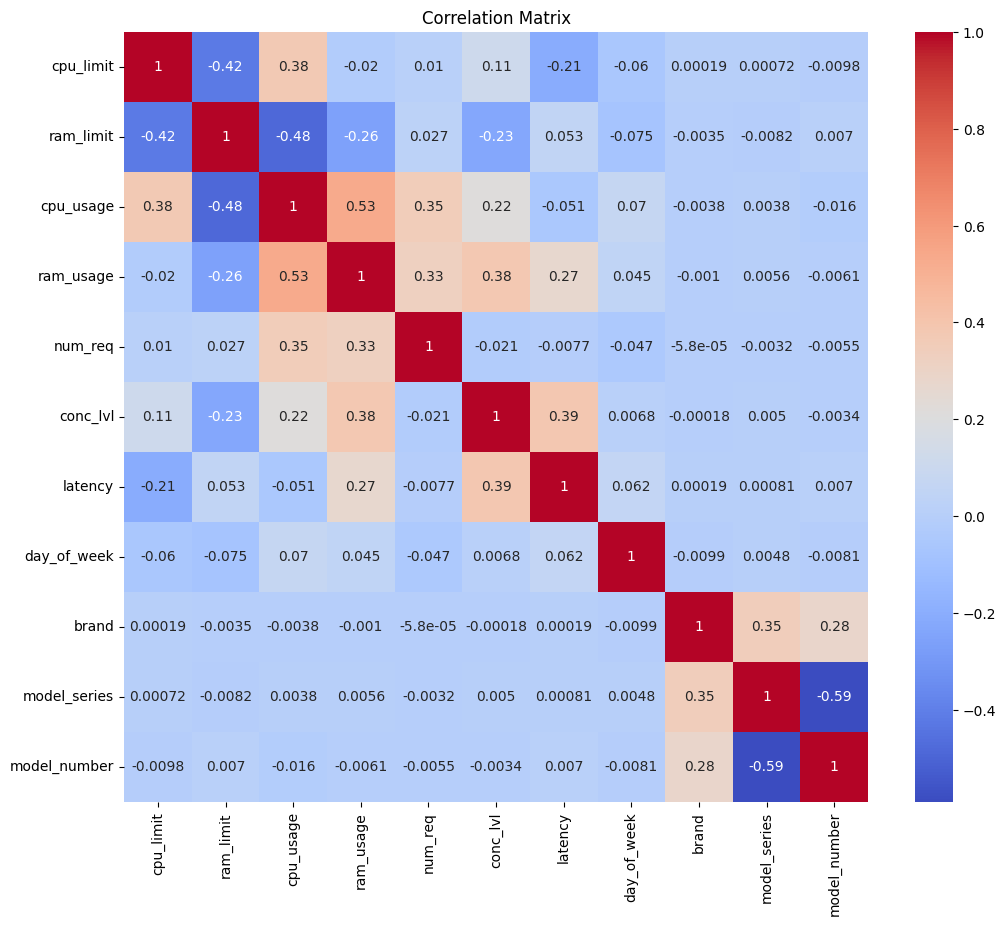

In [14]:
# correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

processed_train_df = pd.read_csv("../../data/preprocessed_training_data.csv")
corr_matrix = processed_train_df.corr()

plt.figure(figsize=(12, 10))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()